### Carga de datos

In [34]:
import pandas as pd

file_path = 'default of credit card clients.xlsx'
data = pd.read_excel(file_path, header=1)  
data_original=pd.read_excel(file_path, header=1)  
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

### Estadisticas e información

In [35]:
print("Información básica de los datos:")
data.info()


Información básica de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   

In [39]:
data.describe()
#exportar tabla a estadisticas descriptivas a excel
data.describe().to_excel('estadisticas_descriptivas.xlsx')


### Corrección de variables categoricas

In [4]:
# valores unicos de las variables categoricas
print("Valores únicos en las columnas categóricas:")
print("SEX:", data['SEX'].unique())
print("EDUCATION:", data['EDUCATION'].unique())
print("MARRIAGE:", data['MARRIAGE'].unique())
print("PAY_0:", data['PAY_0'].unique())


Valores únicos en las columnas categóricas:
SEX: [2 1]
EDUCATION: [2 1 3 5 4 6 0]
MARRIAGE: [1 2 3 0]
PAY_0: [ 2 -1  0 -2  1  3  4  8  7  5  6]


In [5]:
# Corregir categorías en EDUCATION
data['EDUCATION'] = data['EDUCATION'].apply(lambda x: 4 if x not in [1, 2, 3, 4] else x)

# Corregir categorías en MARRIAGE
data['MARRIAGE'] = data['MARRIAGE'].apply(lambda x: 3 if x not in [1, 2, 3] else x)

# Corregir categorías en PAY_X (de PAY_0 a PAY_6)
for i in range(7):
    if i == 1:  # Saltar PAY_1 ya que no existe
        continue
    pay_col = 'PAY_' + str(i)
    data[pay_col] = data[pay_col].apply(lambda x: -1 if x == -2 else x)

print("Categorías corregidas:")
print("EDUCATION:", data['EDUCATION'].unique())
print("MARRIAGE:", data['MARRIAGE'].unique())
print("PAY_0 ejemplos:", data['PAY_0'].unique())


Categorías corregidas:
EDUCATION: [2 1 3 4]
MARRIAGE: [1 2 3]
PAY_0 ejemplos: [ 2 -1  0  1  3  4  8  7  5  6]


### Cantidad de registros negativos

In [6]:
# Identificar el número de registros con valores negativos en las columnas BILL_AMT
bill_amt_cols = [col for col in data.columns if 'BILL_AMT' in col]
negative_bill_counts = {col: (data[col] < 0).sum() for col in bill_amt_cols}

print("Número de valores negativos en BILL_AMT por mes:")
print(negative_bill_counts)


Número de valores negativos en BILL_AMT por mes:
{'BILL_AMT1': 590, 'BILL_AMT2': 669, 'BILL_AMT3': 655, 'BILL_AMT4': 675, 'BILL_AMT5': 655, 'BILL_AMT6': 688}


### División de datos limpios y originales

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_categorical_distribution(data, data_original, column, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    sns.countplot(x=column, data=data_original, ax=axes[0], order=sorted(data_original[column].unique()))
    sns.countplot(x=column, data=data, ax=axes[1], order=sorted(data[column].unique()))
    axes[0].set_title( title  + ' original ')
    axes[1].set_title( title + ' limpio ')
    plt.show()


### Diagramas de cajas y Bigotes originales

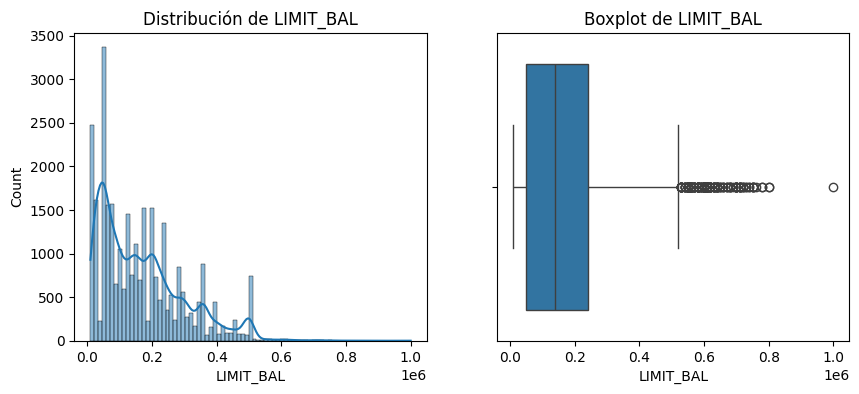

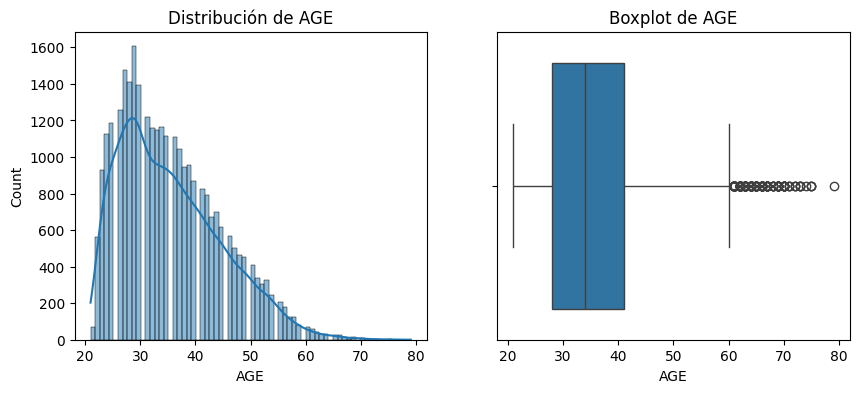

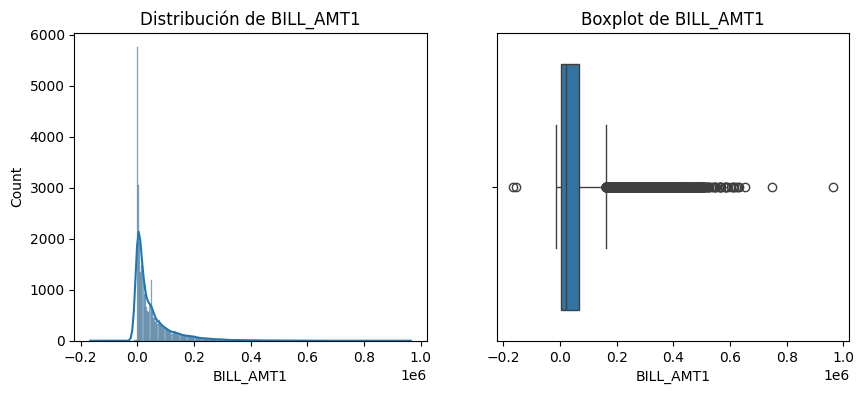

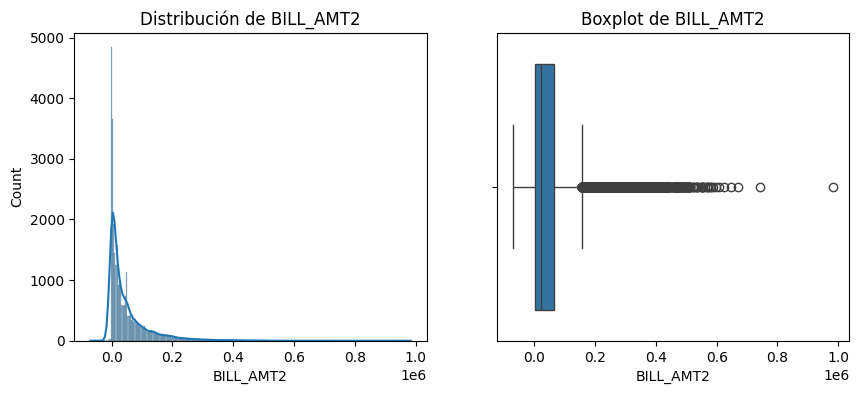

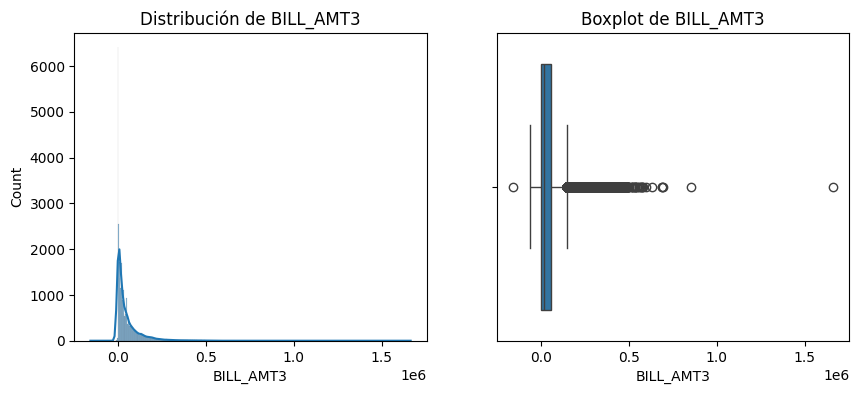

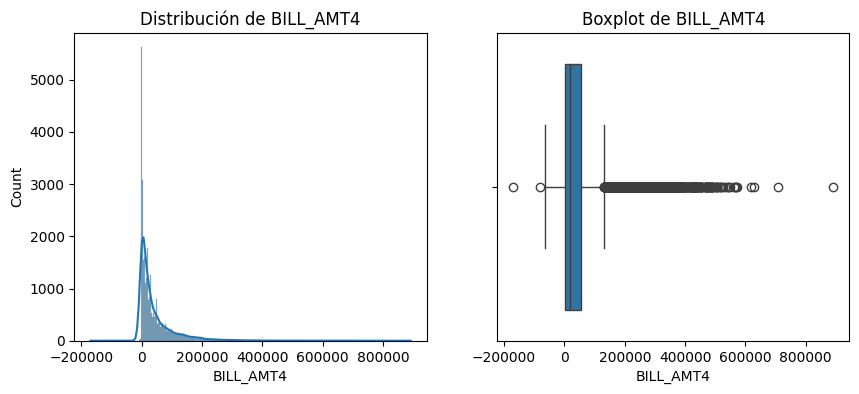

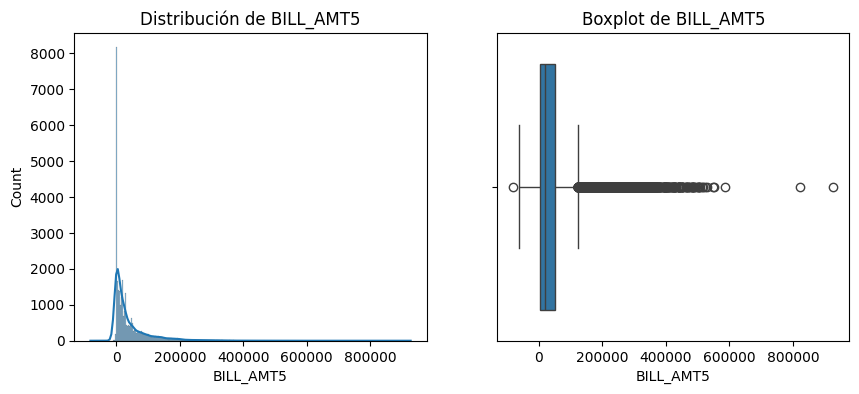

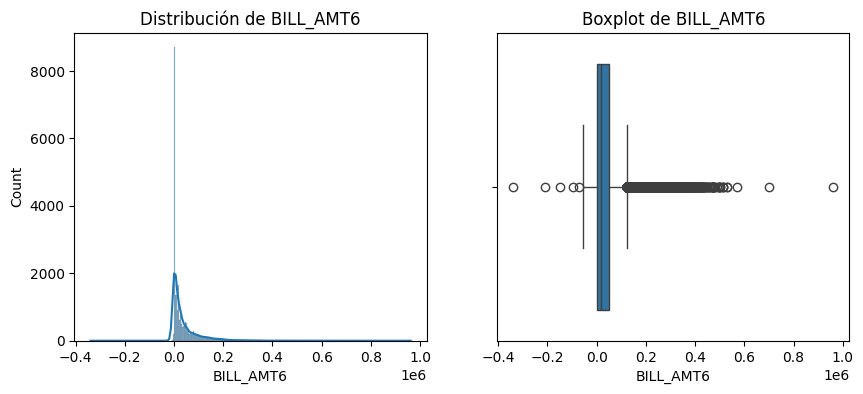

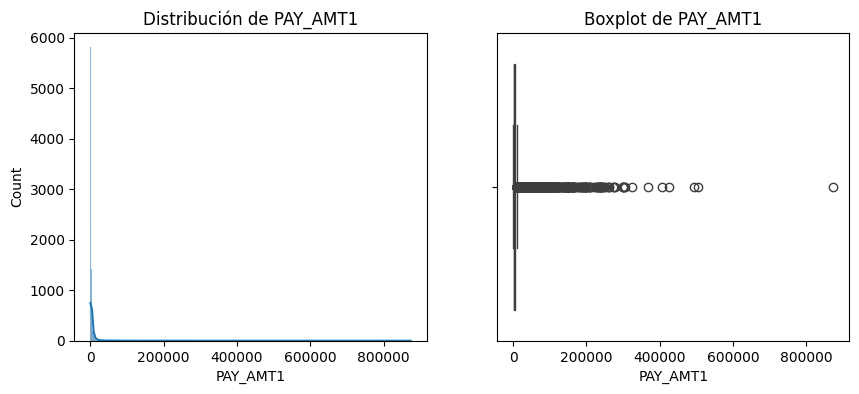

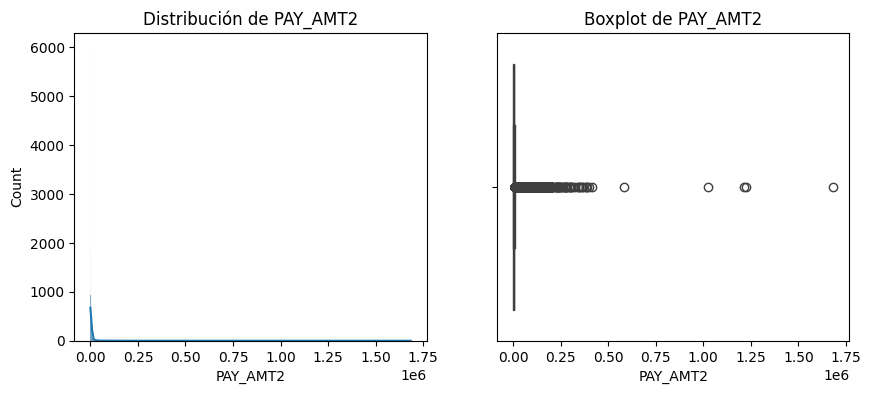

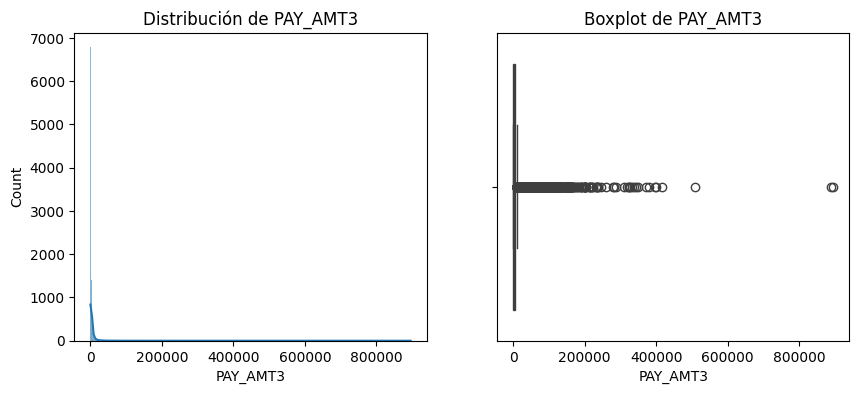

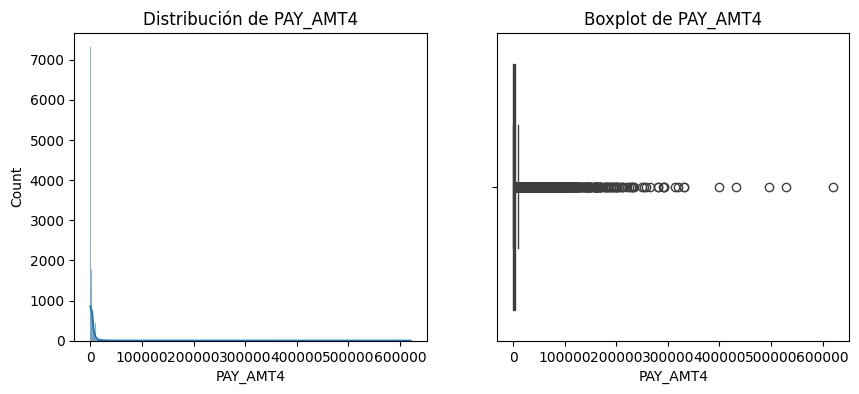

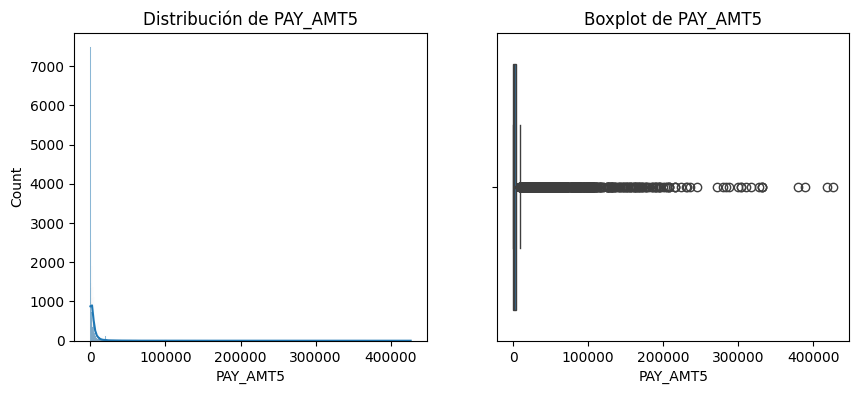

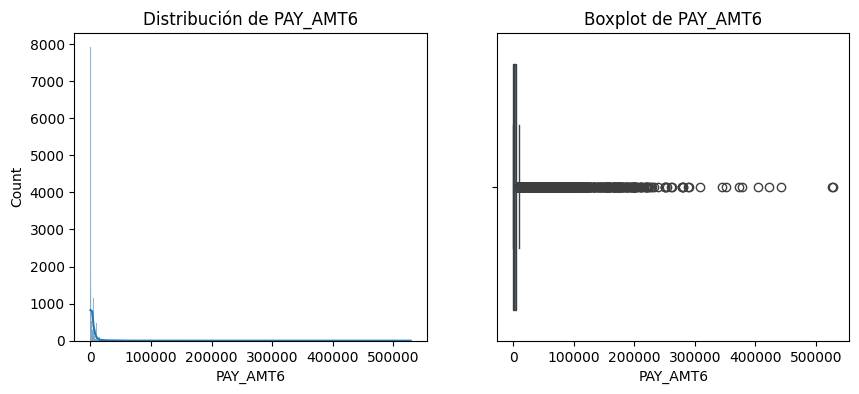

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for var in numerical_vars:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribución de {var}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var])
    plt.title(f'Boxplot de {var}')
    
    plt.show()



### Correlación entre variables de entrada

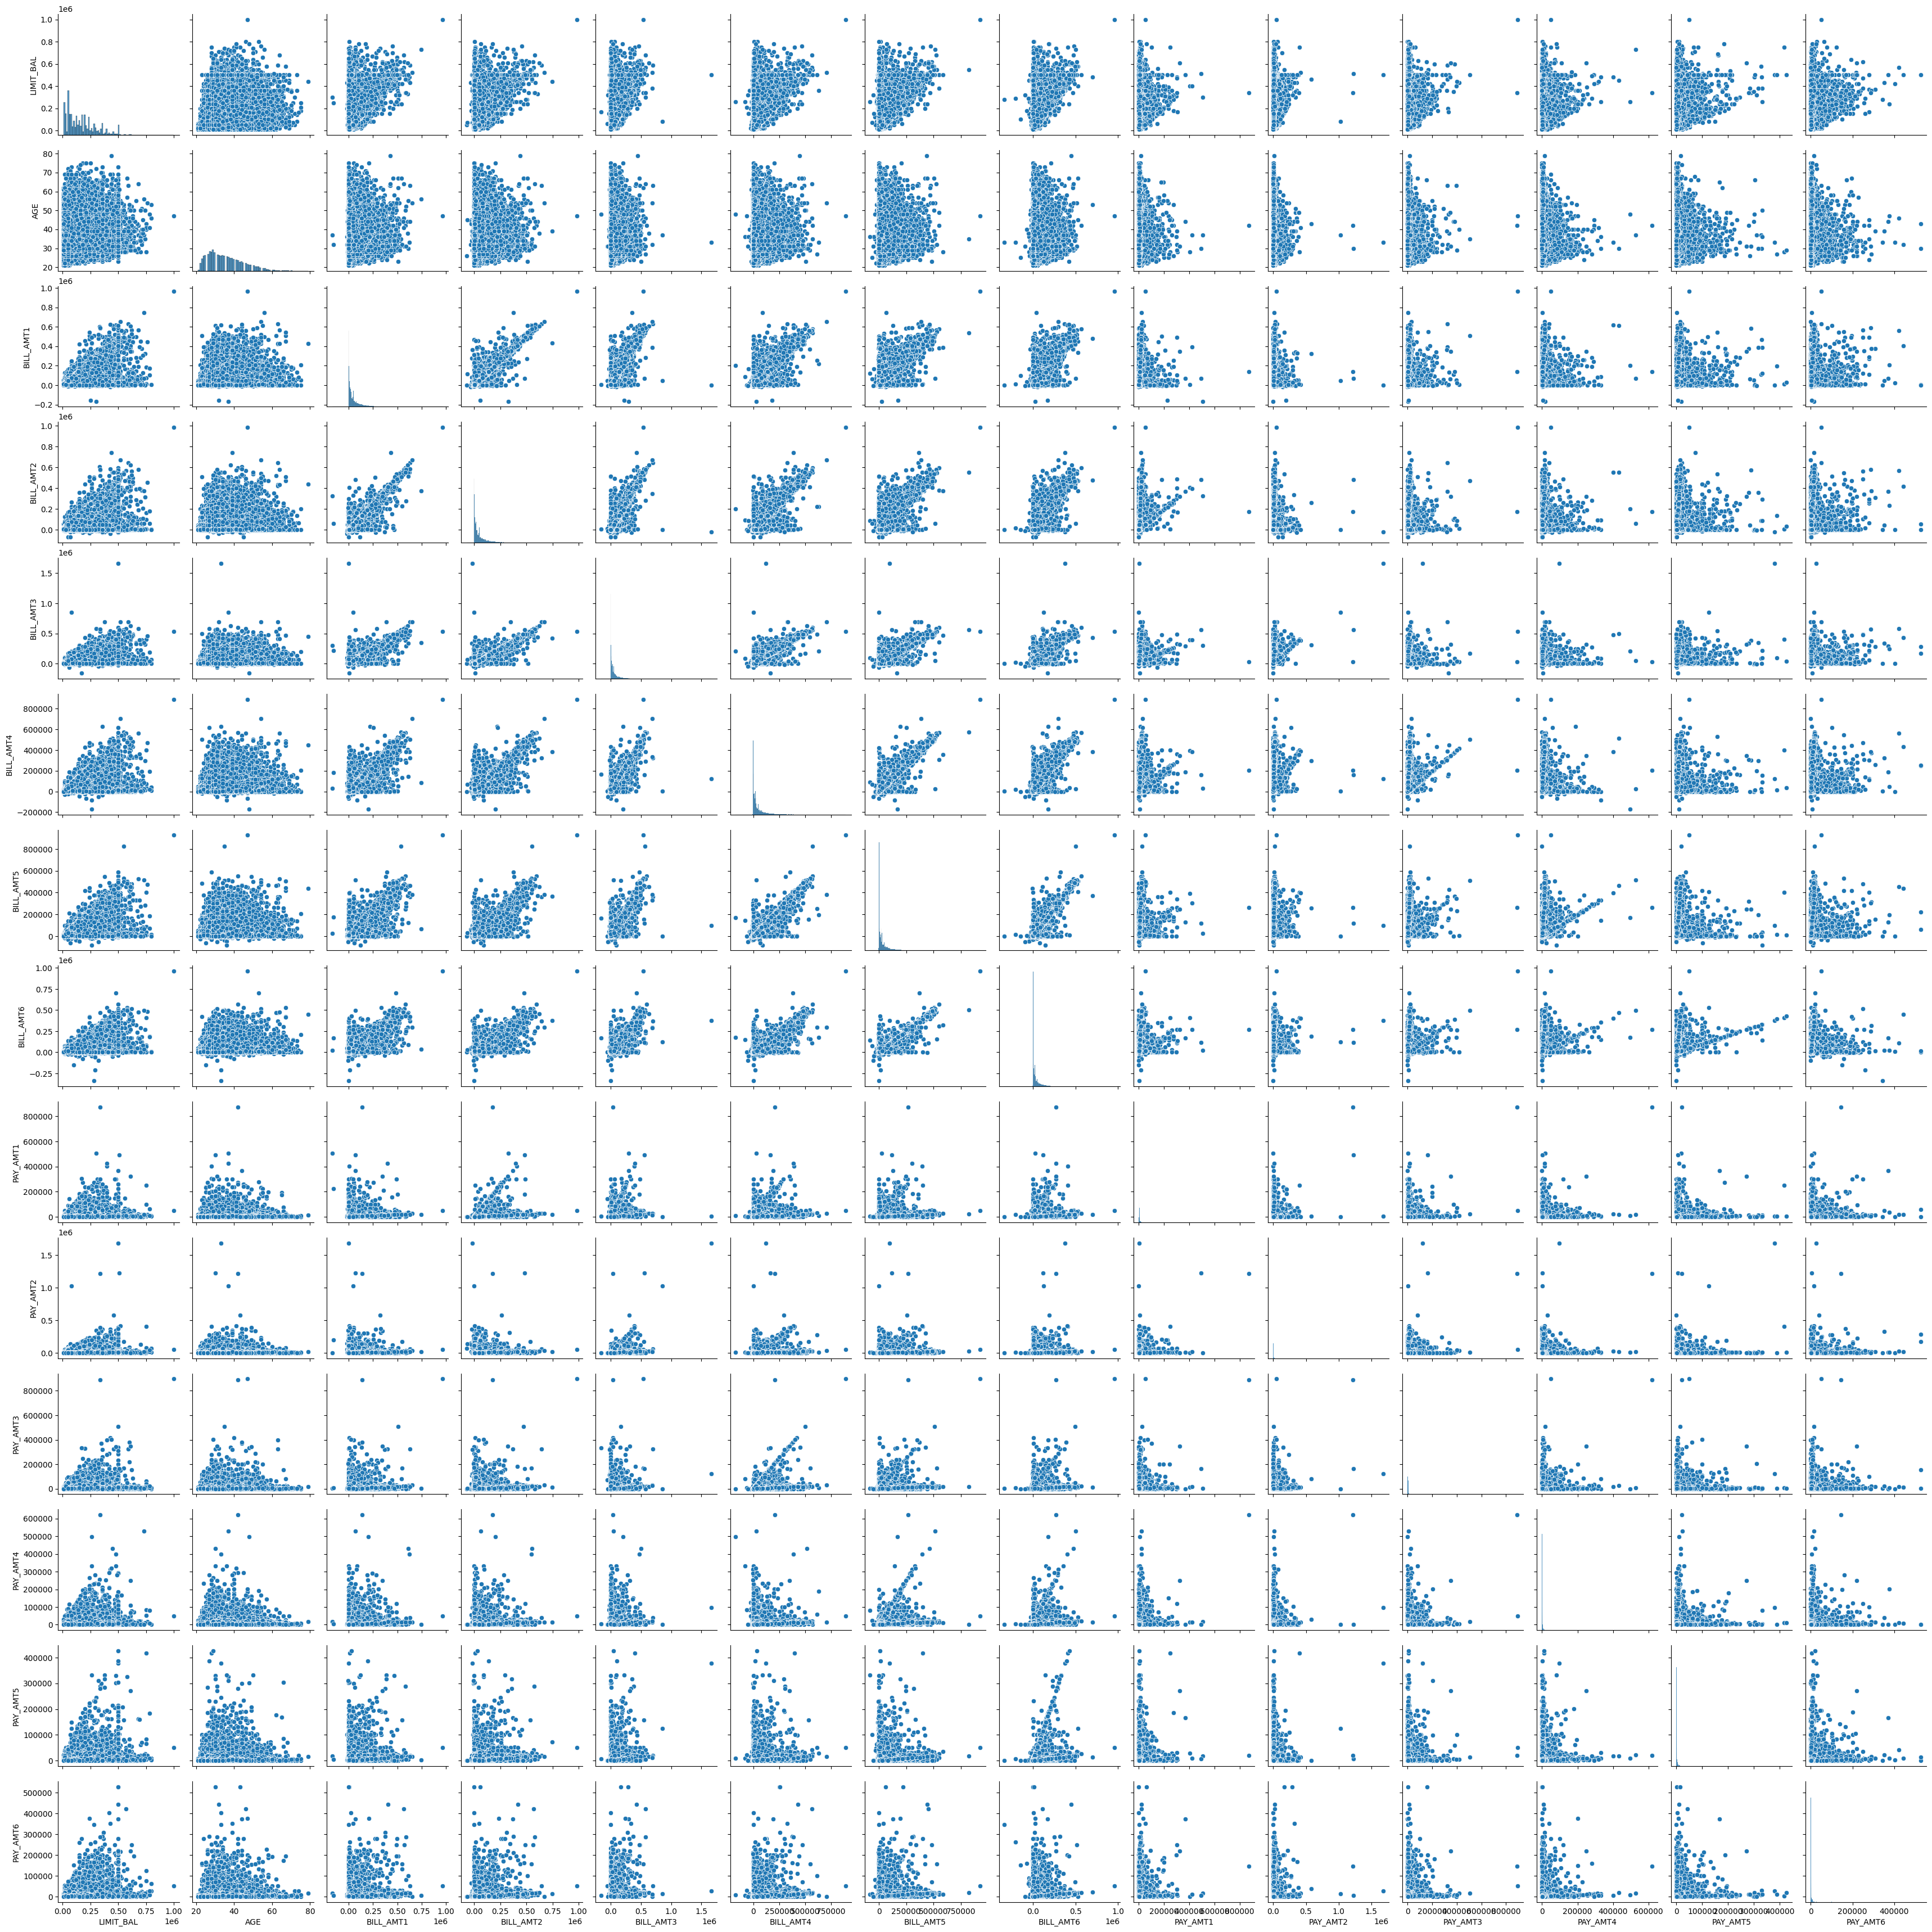

In [9]:
sns.pairplot(data[numerical_vars],)

### Datos fuera de los cuartiles 1 y 3

In [11]:
description = data.describe()
outliers = {}
for var in numerical_vars:
    q1 = description.loc['25%', var]
    q3 = description.loc['75%', var]
    iqr = q3 - q1
    outliers[var] = ((data[var] < q1 - 1.5 * iqr) | (data[var] > q3 + 1.5 * iqr)).sum()

print("Número de outliers por variable:")
print(outliers)


Número de outliers por variable:
{'LIMIT_BAL': 167, 'AGE': 272, 'BILL_AMT1': 2400, 'BILL_AMT2': 2395, 'BILL_AMT3': 2469, 'BILL_AMT4': 2622, 'BILL_AMT5': 2725, 'BILL_AMT6': 2693, 'PAY_AMT1': 2745, 'PAY_AMT2': 2714, 'PAY_AMT3': 2598, 'PAY_AMT4': 2994, 'PAY_AMT5': 2945, 'PAY_AMT6': 2958}


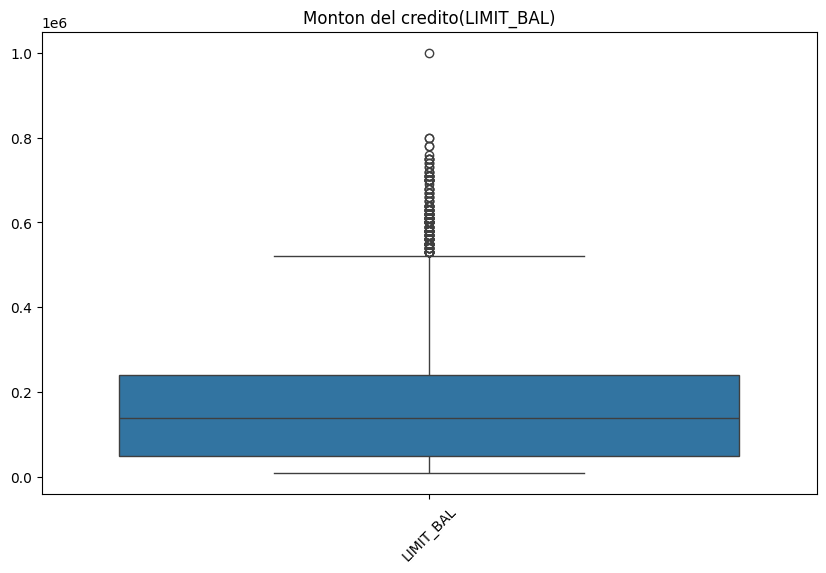

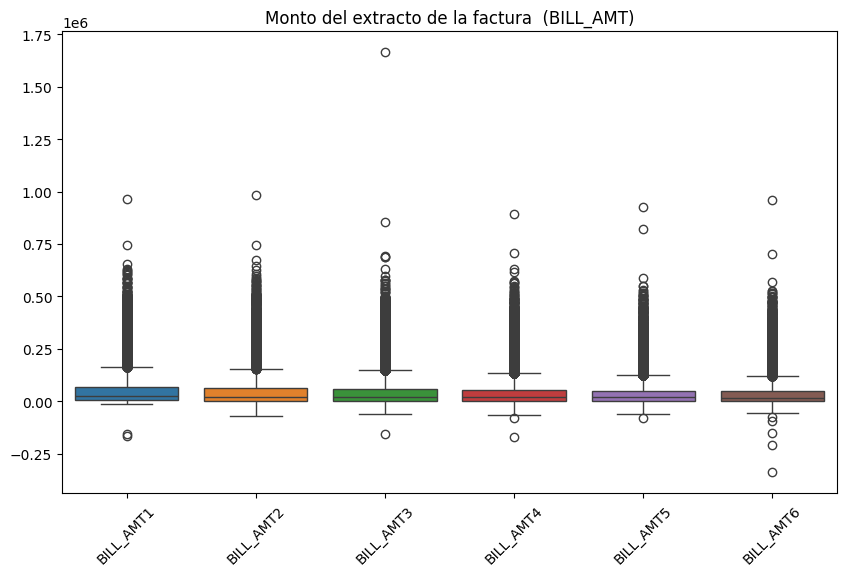

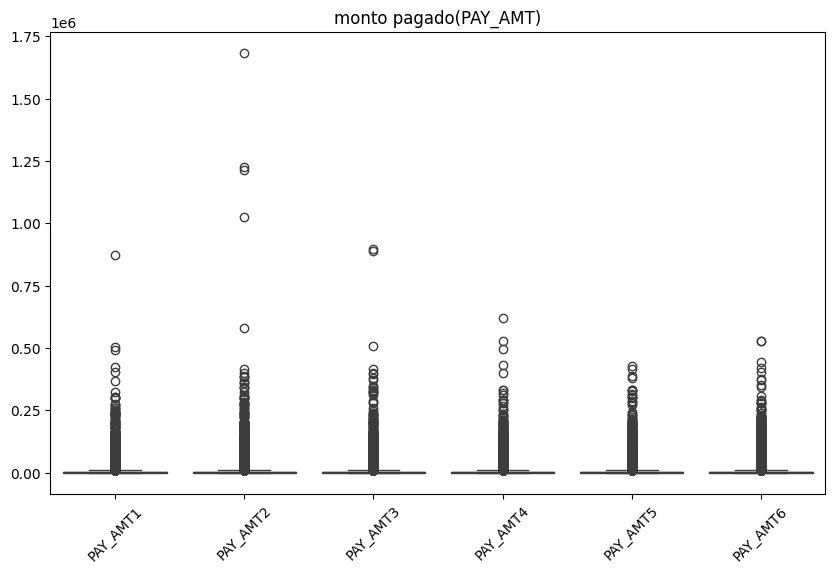

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mostrar los gráficos en Jupyter
%matplotlib inline

# Definir los grupos de variables
limit_bal_vars = ['LIMIT_BAL']
bill_amt_vars = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_vars = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Función para crear diagramas de caja
def plot_boxplots(data, columns, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data[columns])
    plt.title(title)
    plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
    plt.show()

# Visualizar los cambios para LIMIT_BAL
plot_boxplots(data, limit_bal_vars, 'Monton del credito(LIMIT_BAL)')

# Visualizar los cambios para BILL_AMT
plot_boxplots(data, bill_amt_vars, 'Monto del extracto de la factura  (BILL_AMT)')

# Visualizar los cambios para PAY_AMT
plot_boxplots(data, pay_amt_vars, 'monto pagado(PAY_AMT)')


### Comparación entre var categoricas originales y modificadas

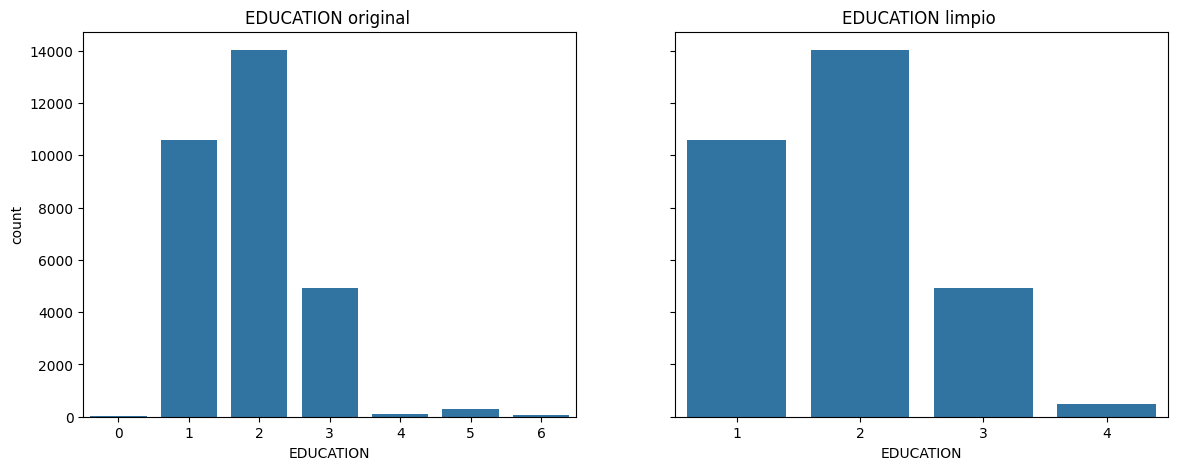

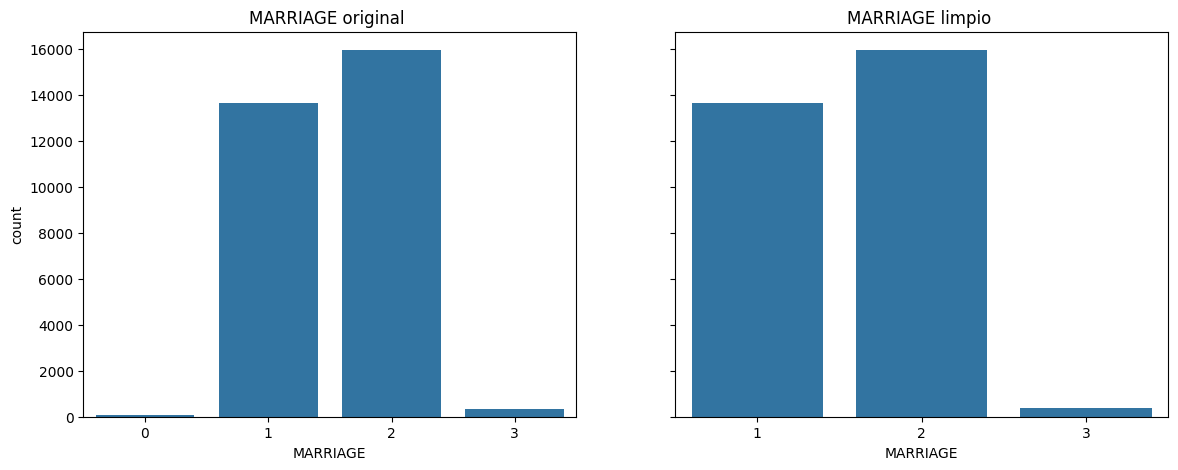

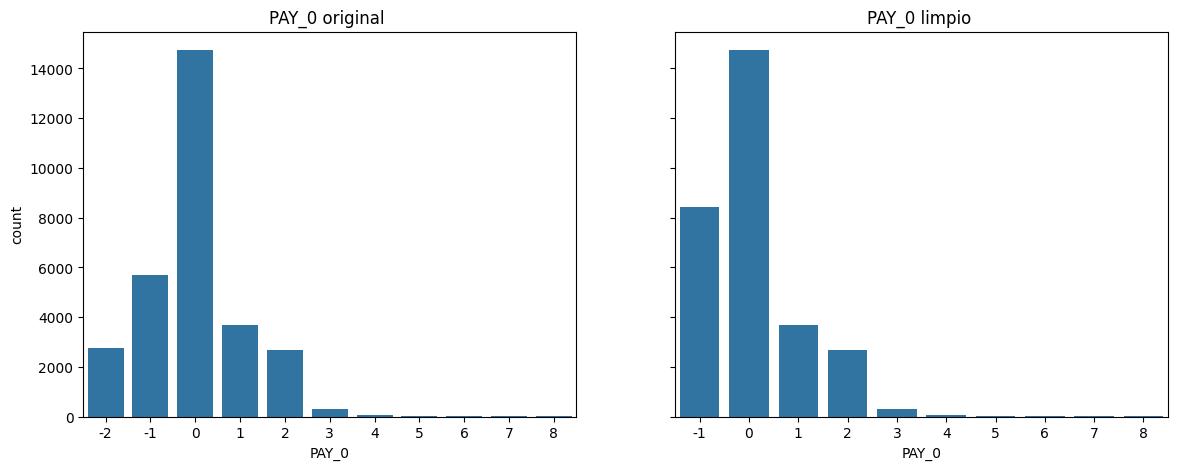

In [13]:
import matplotlib.pyplot as plt
# Lista de variables categóricas para visualizar
categorical_vars = ['EDUCATION', 'MARRIAGE', 'PAY_0']

for var in categorical_vars:
    plot_categorical_distribution(data, data_original, var, var)



### Correlación entre variables

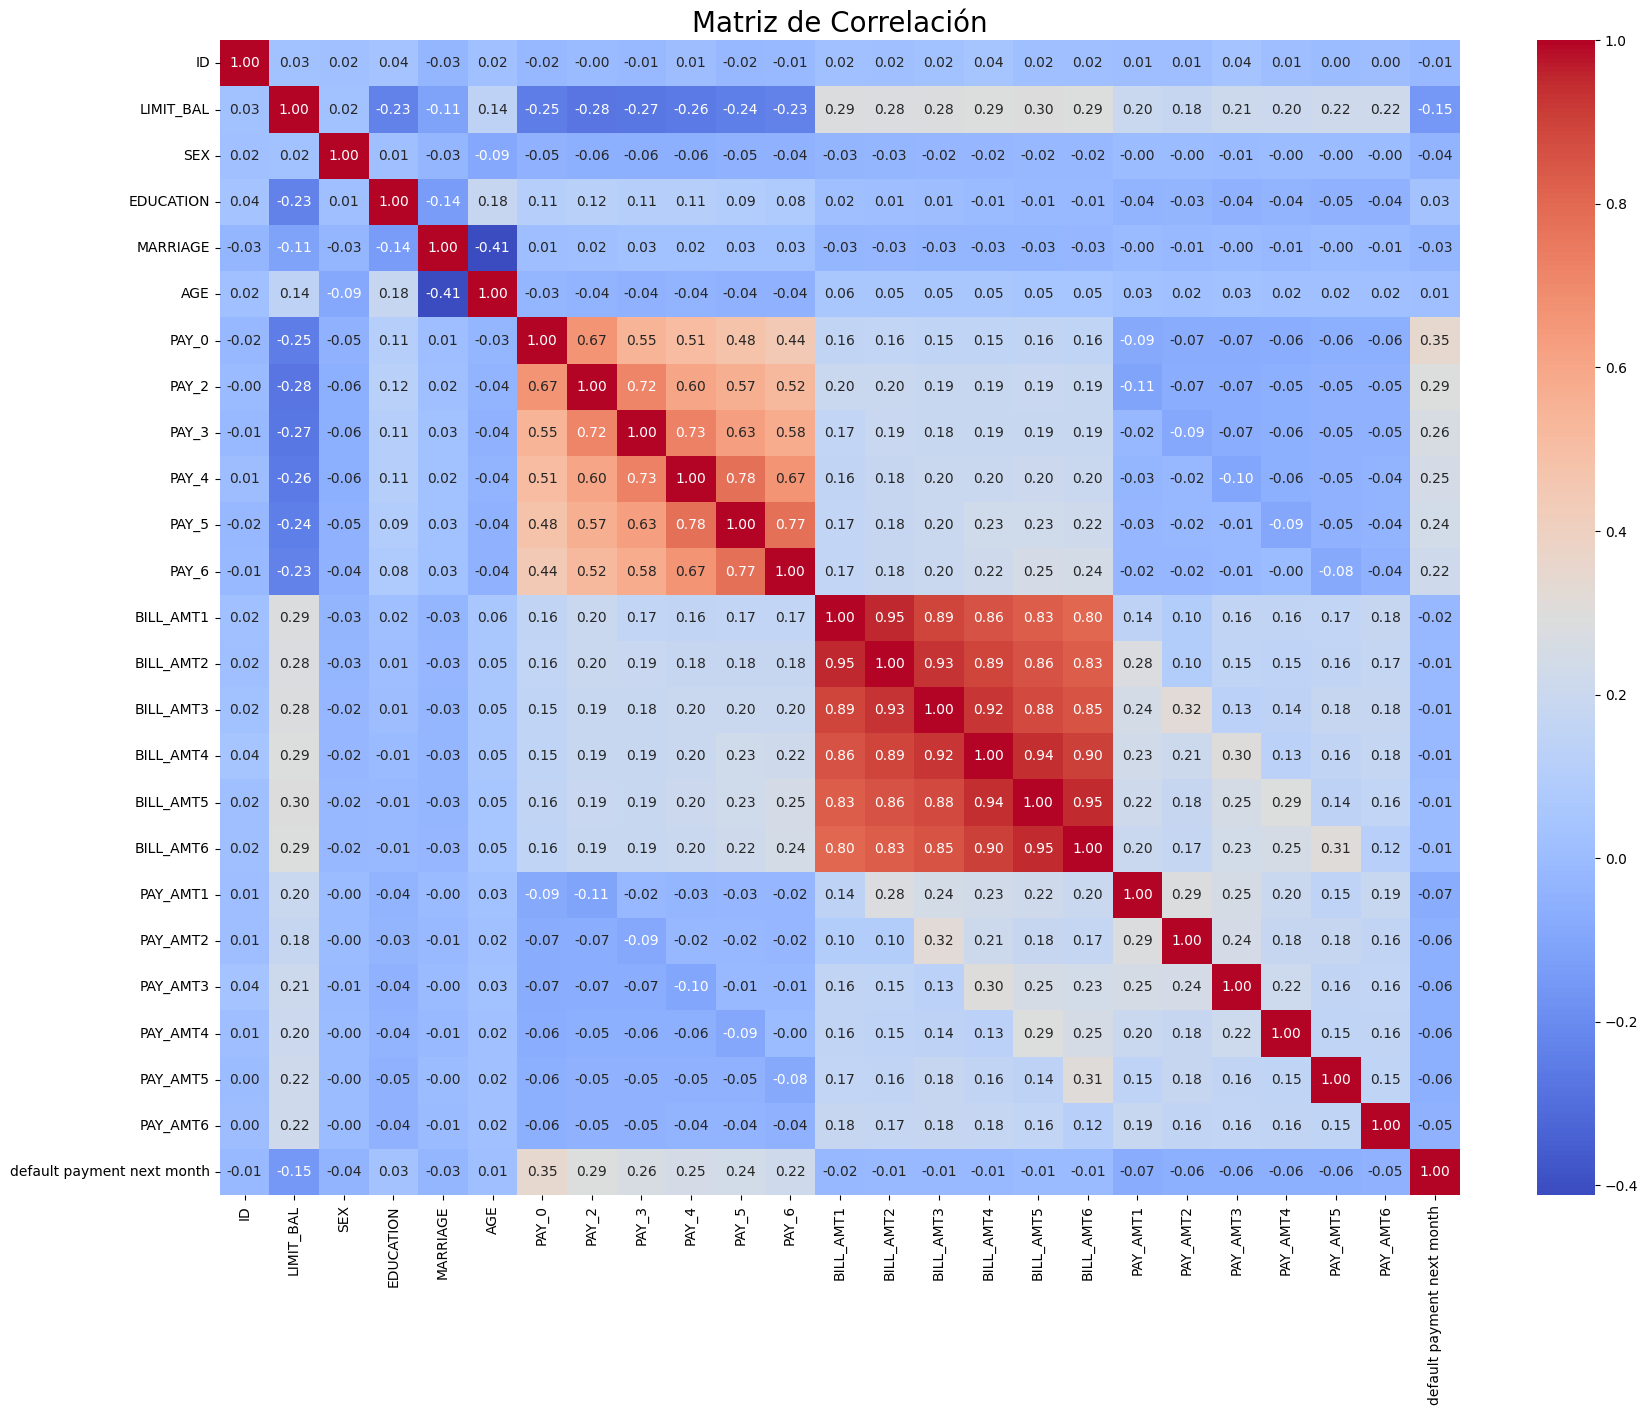

In [14]:
import seaborn as sns

correlation_matrix = data.corr()

# Aumentar el tamaño de la figura
plt.figure(figsize=(20, 15))

# Crear un heatmap con anotaciones y un colormap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 10})

# Ajustar el título y mostrar la figura
plt.title('Matriz de Correlación', size=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [15]:
data.shape

(30000, 25)

C:\Users\57313\AppData\Local\Temp\ipykernel_12232\2525329434.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)  # Usar nombres de meses directamente
C:\Users\57313\AppData\Local\Temp\ipykernel_12232\2525329434.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)  # Usar nombres de meses directamente


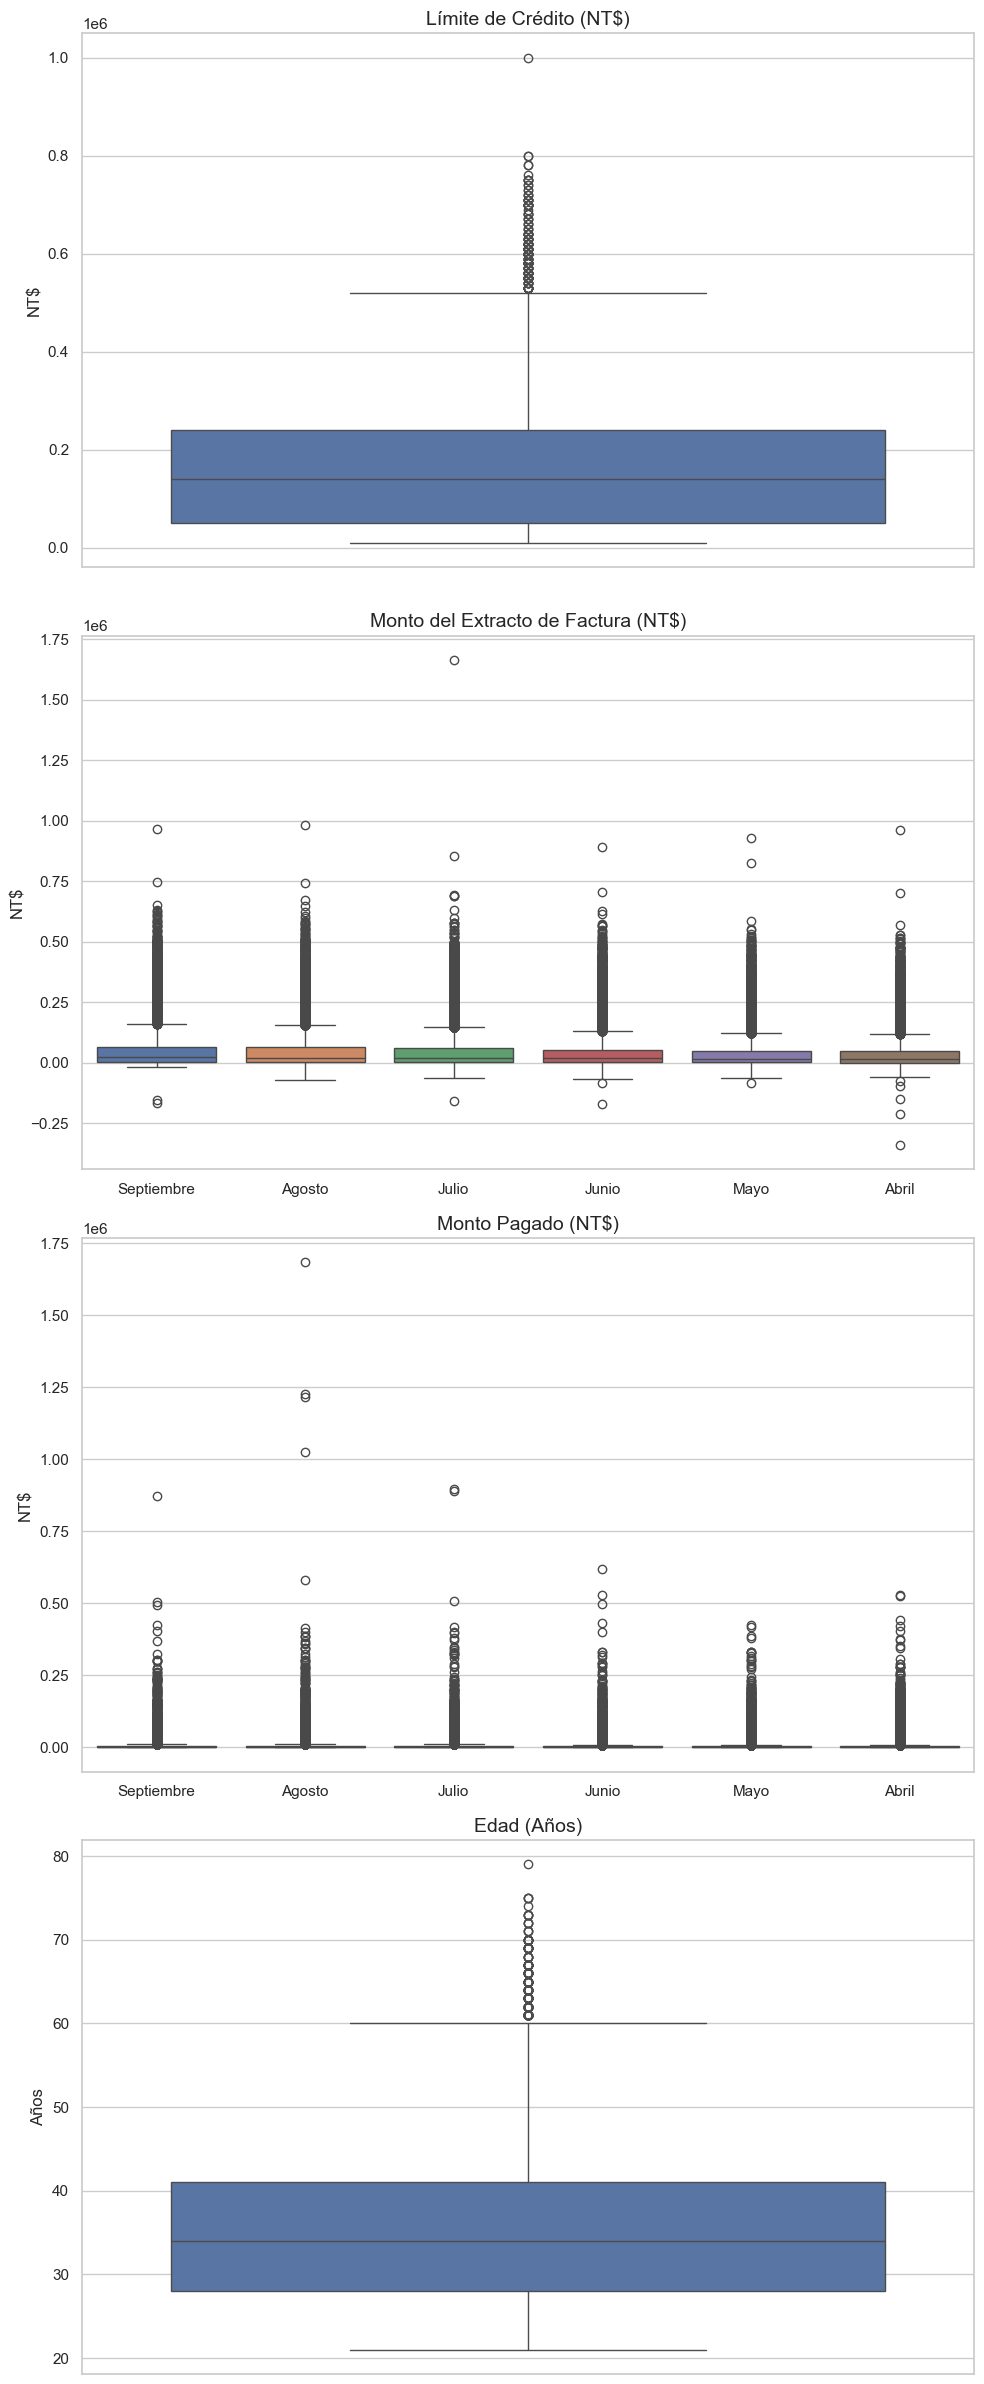

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mostrar los gráficos en Jupyter
%matplotlib inline

# Definir los grupos de variables
age_vars = ['AGE']
limit_bal_vars = ['LIMIT_BAL']
bill_amt_vars = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_vars = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
months_bill = ['Septiembre', 'Agosto', 'Julio', 'Junio', 'Mayo', 'Abril']
months_pay = ['Septiembre', 'Agosto', 'Julio', 'Junio', 'Mayo', 'Abril']

# Crear una figura para contener todos los boxplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 24))

# Función para crear diagramas de caja con límites específicos y sin rotar etiquetas
def plot_boxplots_with_limits(data, columns, title, ax, xticklabels=None, ylim=None, ylabel=None):
    sns.boxplot(data=data[columns], ax=ax)
    ax.set_title(title, fontsize=14)
    if xticklabels:
        ax.set_xticklabels(xticklabels)  # Usar nombres de meses directamente
    else:
        ax.set_xticklabels([])  # Eliminar xticklabels si no son necesarios
    if ylim:
        ax.set_ylim(ylim)  # Establecer límites en el eje Y para "zoom"
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=12)

# Visualizar los cambios para LIMIT_BAL
plot_boxplots_with_limits(data, limit_bal_vars, 'Límite de Crédito (NT$)', axes[0], ylabel="NT$")

# Visualizar los cambios para BILL_AMT con zoom
plot_boxplots_with_limits(data, bill_amt_vars, 'Monto del Extracto de Factura (NT$)', axes[1], xticklabels=months_bill, ylabel="NT$")

# Visualizar los cambios para PAY_AMT con zoom
plot_boxplots_with_limits(data, pay_amt_vars, 'Monto Pagado (NT$)', axes[2], xticklabels=months_pay, ylabel="NT$")

# Visualizar los cambios para AGE
plot_boxplots_with_limits(data, age_vars, 'Edad (Años)', axes[3], ylabel="Años")

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

C:\Users\57313\AppData\Local\Temp\ipykernel_12232\404264127.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)  # Usar nombres de meses directamente
C:\Users\57313\AppData\Local\Temp\ipykernel_12232\404264127.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)  # Usar nombres de meses directamente


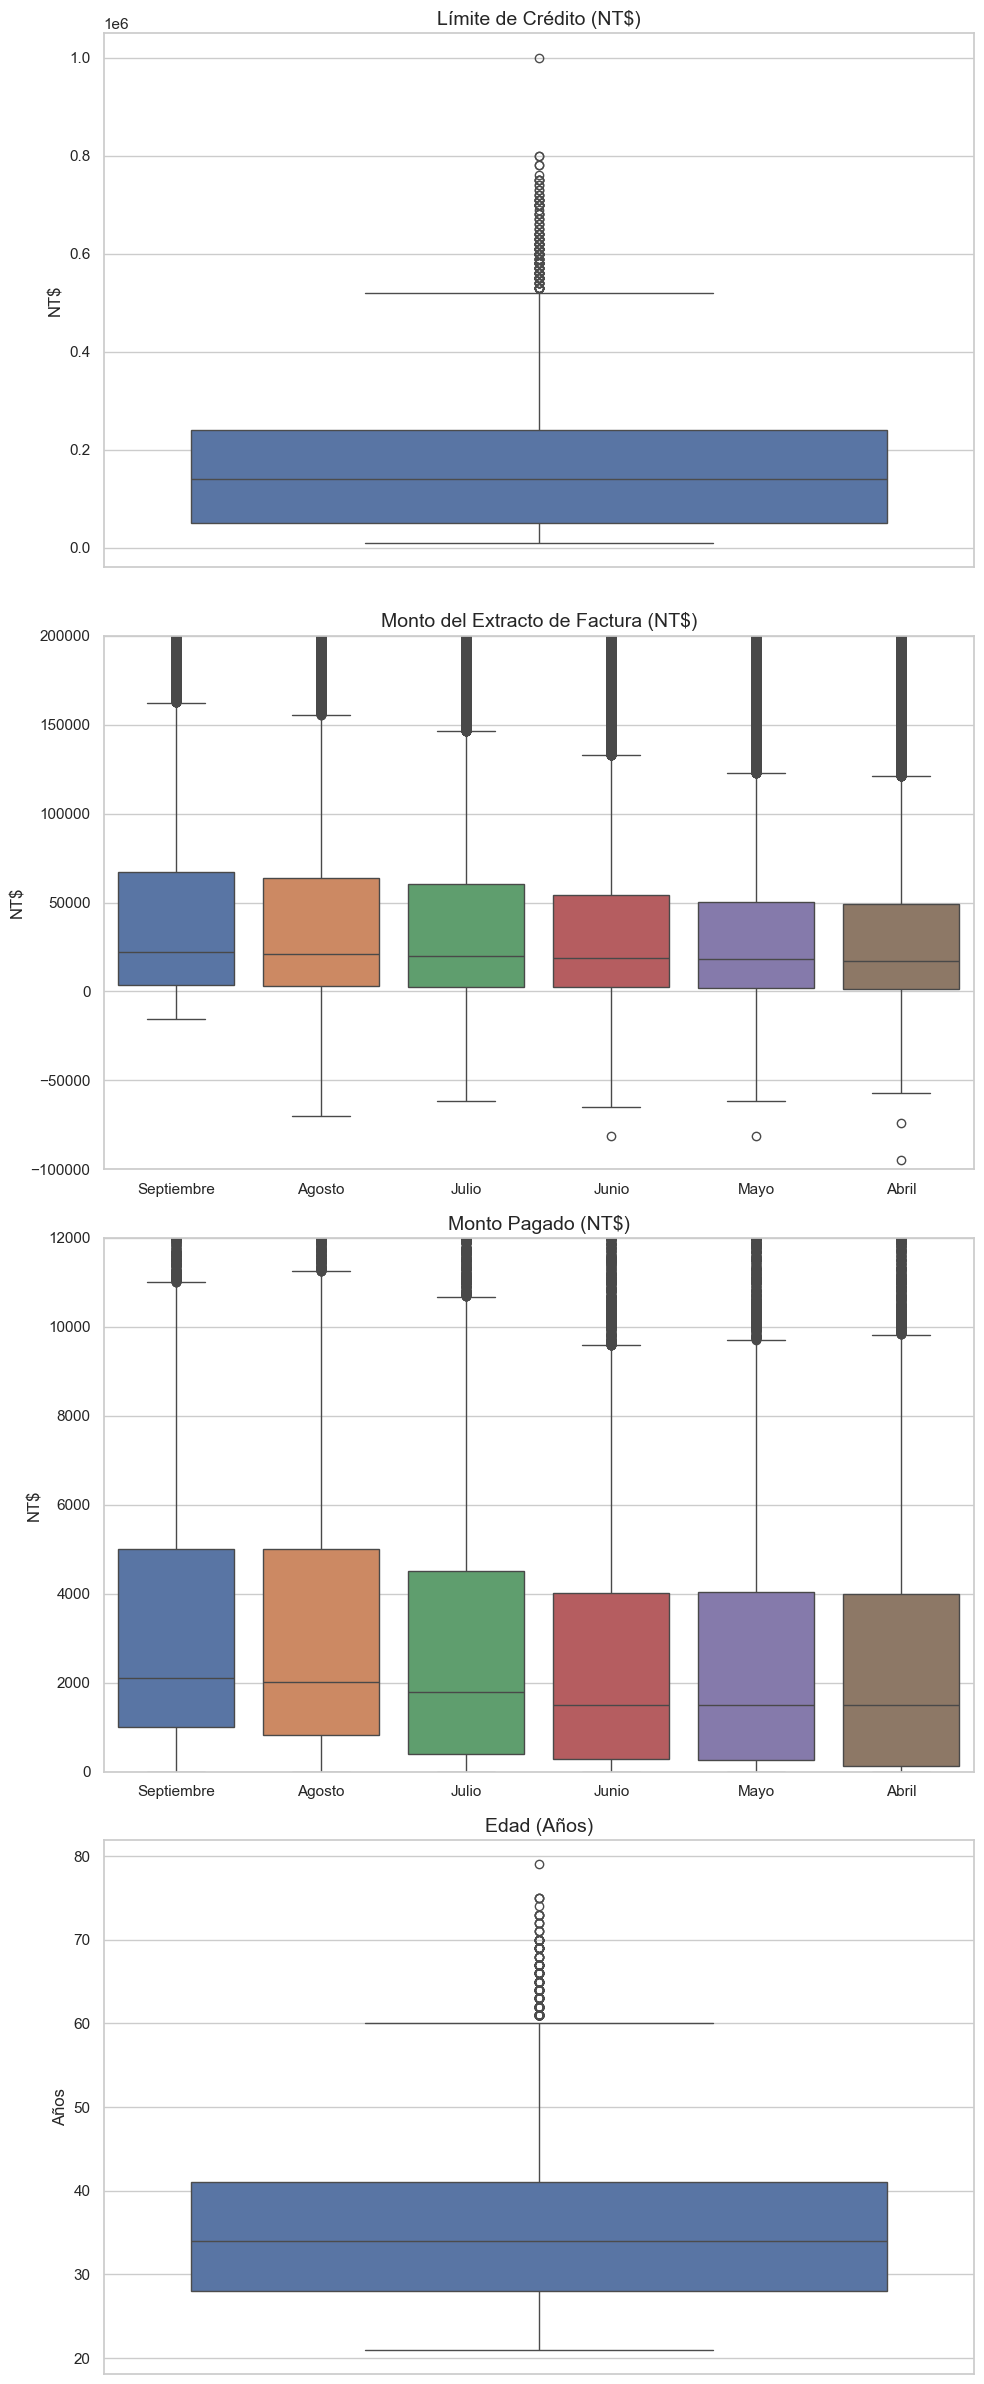

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mostrar los gráficos en Jupyter
%matplotlib inline

# Definir los grupos de variables
age_vars = ['AGE']
limit_bal_vars = ['LIMIT_BAL']
bill_amt_vars = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_vars = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
months_bill = ['Septiembre', 'Agosto', 'Julio', 'Junio', 'Mayo', 'Abril']
months_pay = ['Septiembre', 'Agosto', 'Julio', 'Junio', 'Mayo', 'Abril']

# Crear una figura para contener todos los boxplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 24))

# Función para crear diagramas de caja con límites específicos y sin rotar etiquetas
def plot_boxplots_with_limits(data, columns, title, ax, xticklabels=None, ylim=None, ylabel=None):
    sns.boxplot(data=data[columns], ax=ax)
    ax.set_title(title, fontsize=14)
    if xticklabels:
        ax.set_xticklabels(xticklabels)  # Usar nombres de meses directamente
    else:
        ax.set_xticklabels([])  # Eliminar xticklabels si no son necesarios
    if ylim:
        ax.set_ylim(ylim)  # Establecer límites en el eje Y para "zoom"
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=12)

# Visualizar los cambios para LIMIT_BAL
plot_boxplots_with_limits(data, limit_bal_vars, 'Límite de Crédito (NT$)', axes[0], ylabel="NT$")

# Visualizar los cambios para BILL_AMT con zoom
plot_boxplots_with_limits(data, bill_amt_vars, 'Monto del Extracto de Factura (NT$)', axes[1], xticklabels=months_bill, ylim=(-0.1e6, 0.2e6), ylabel="NT$")

# Visualizar los cambios para PAY_AMT con zoom
plot_boxplots_with_limits(data, pay_amt_vars, 'Monto Pagado (NT$)', axes[2], xticklabels=months_pay, ylim=(0, 12000), ylabel="NT$")

# Visualizar los cambios para AGE
plot_boxplots_with_limits(data, age_vars, 'Edad (Años)', axes[3], ylabel="Años")

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


### Exportación de datos 

In [ ]:
data.to_excel('finales.xlsx', index=False)